* #                                       **Titanic Disaster Competition**


This is my first Competition at Kaggle.
I will try to perform a good analysis of the data and build an appropriate model.


*** Project Steps:**

**1. Data Visualization**

**2. Encoding String Type Variables**

**3. Encoding Categorical Variables**

**4. Data Standardization and Solving For Missing Values**

**5. Dimensionality Reduction**

**6. Data Split**

**7. Building the Models**





First, Let's start by importing the DataSets and reading it.

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import os

for dirname, _, filenames in os.walk('/kaggle/input'): # get files directories
    for filename in filenames:
        print(os.path.join(dirname, filename))

missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"," "] # Taking into account Missing Values

titanic_train_file_path = '../input/titanic/train.csv'
titanic_train = pd.read_csv(titanic_train_file_path, na_values = missing_value_formats) # reading the training set

titanic_test_file_path = '../input/titanic/test.csv'
titanic_test = pd.read_csv(titanic_test_file_path, na_values = missing_value_formats)# reading the final testing set

titanic_train.head() # first 10 rows of the data




/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Following this Url: https://www.kaggle.com/c/titanic/data , you'll find the Data Dictionnary which explains the meaning of variables names.

Input variables:

* **pclass**: Ticket class - Categorical - Values: 1 = 1st, 2 = 2nd, 3 = 3rd.
* **sex**: Categorical - Values: male or female.
* **Age**: Age in years - Numerical.
* **sibsp**: # of siblings / spouses aboard the Titanic - Numerical.
* **parch**: # of parents / children aboard the Titanic - Numerical.
* **ticket**: Ticket number - Mix of Numbers and Characters.
* **fare**: Passenger fare - Numerical.
* **cabin**: Cabin number - Mix of Numbers and Characters.
* **embarked**: Port of Embarkation - Categorical - Values: C = Cherbourg, Q = Queenstown, S = Southampton.

Target Variable:
* **survival**: Categorical - Values: 0 = No, 1 = Yes.



In [3]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


For the Variables : "PassengerId", "Survived" , "Pclass", the statistics **mean** and **standard deviation** (**std**) are meaningless.

What informations does this table brings:

At First, we can see that we have **891** passenger. their **mean** age is about **29.6** with a standard deviation of **14.5** years which means that for **+** and **- 28** years we capture more than **60%** of the population assuming that we a **Normal distribution** of Ages of the Titanic Population.

By continuing to read the table we get more information for example the **75%** quantile is equal to **38** years and that means that **75%** of the passengers have less than **38** years of age which make the Titanic population a quite young one.

At Second, from the columns of **SibSp** and **Parch** we see that both means are less than **1** which is normal and we can conclude that half of the population have one Sibling/Spouse and **38%** of the population have **1** Parent/Child.

At Last, We have an Important Variable which is **Fare**, this Variable have a high chance to be most explanatory Variable in the final model. Let's start by observing it's statistics: we can see from the mean and std that it has a very high standard deviation which means that there is a big disparity of Fare between the passengers and we can suspect that based on the median value compared to the max and the **75%** quantile. Anyway this will either be  confirmed or disconfirmed by the plots that we're going to make after this.

**P.S: There are 64% male Against 36% female.**


 # 1. Data Visualisation:


Now, Let's move to the plots:



In [4]:
# Center the charts

from IPython.core.display import HTML 
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

* **Plotting The Variable 'Survived':** 

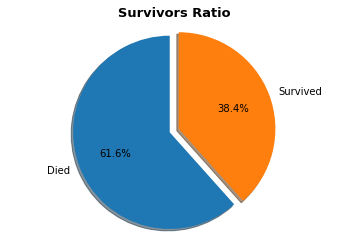

In [5]:
# Pie chart of Variable 'Survived'


import matplotlib.pyplot as plt

labels = 'Died', 'Survived'
sizes = [titanic_train['Survived'].loc[titanic_train['Survived'] == 0].count()/titanic_train['Survived'].count(), titanic_train['Survived'].loc[titanic_train['Survived'] == 1].count()/titanic_train['Survived'].count()]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Survived')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Survivors Ratio',  fontsize=13,fontweight='bold')
plt.show()

**Comment:** 

The Pie Chart is a way of representing the ratio of Survivors in the Passengers Population of the Training Data.
We can see that the amount of survivors counts for about 38%.

* **Plotting of Variable 'Pclass':**

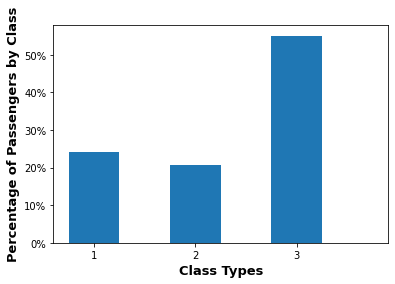

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


plt.hist(titanic_train['Pclass'],weights=np.ones(len(titanic_train['Pclass'])) / len(titanic_train['Pclass']), bins=np.arange(1,5)-0.25 , width=0.5)

plt.ylabel('Percentage of Passengers by Class',  fontsize=13,fontweight='bold')
plt.xlabel('Class Types',  fontsize=13,fontweight='bold')
plt.xticks(range(1,4))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

**Comment:** 

The Chart Above represents the Percentage of Passengers in each Class.
We can see that the amount of Passengers in Class 3 is the widest and it is the smallest in Class 2.

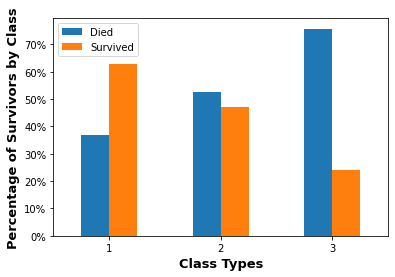

In [7]:
import numpy as np
import matplotlib.pyplot as plt

df=pd.crosstab(titanic_train['Pclass'],titanic_train['Survived']).apply(lambda r: r/r.sum(), axis=1)
df.plot.bar()
plt.ylabel('Percentage of Survivors by Class',  fontsize=13,fontweight='bold')
plt.xlabel('Class Types',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)

L=plt.legend()
L.get_texts()[0].set_text('Died')
L.get_texts()[1].set_text('Survived')
plt.show()



**Comment:**

The chart above represents the Percentage of Survivors and Dead Passengers in Each Class.
We can see that Class 1 and Class 3 represent opposite behaviours of Variable 'Survived' as the Majority of Passengers of Class 3 have Died Which is the opposite of what happened in Class 1.

* **Plotting of Variable 'Sex':**

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Female', 'Male'
sizes = [titanic_train['Sex'].loc[titanic_train['Sex'] == "female"].count()/titanic_train['Sex'].count(), titanic_train['Sex'].loc[titanic_train['Sex'] == "male"].count()/titanic_train['Sex'].count()]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sex Ratio',  fontsize=13,fontweight='bold')
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


df=pd.crosstab(titanic_train['Sex'],titanic_train['Survived']).apply(lambda r: r/r.sum(), axis=1)
df.plot.bar()
plt.ylabel('Percentage of Survivors by Sex',  fontsize=13,fontweight='bold')
plt.xlabel('Sex',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)

L=plt.legend()
L.get_texts()[0].set_text('Died')
L.get_texts()[1].set_text('Survived')
plt.show()

plt.show()

**Comment:**

For the Female Sex the Majority Survived, While the Opposite happened for the Male Sex.

* **Plotting Of The Variable 'Age':**

In [ ]:
titanic_train.groupby('Sex').Age.plot(kind='kde')
plt.ylabel('Percentage of Passengers',  fontsize=13,fontweight='bold')
plt.xlabel('Age',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)
plt.xlim(xmin=0,xmax=100 )
plt.legend()
plt.show()

**Comment:**

We Conclude from the Chart Above That Age has identical Distribution By Sex in the Population of Passengers.

In [ ]:
titanic_train.groupby('Pclass').Age.plot(kind='kde')
plt.ylabel('Percentage of Passengers',  fontsize=13,fontweight='bold')
plt.xlabel('Age',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)
plt.xlim(xmin=0,xmax=100 )
plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('1st Class')
L.get_texts()[1].set_text('2nd Class')
L.get_texts()[2].set_text('3rd Class')


plt.show()

**Comment:**

The Conclusion for the Above Chart is that the more Age we have the higher is the probability to be in a Higher Class.

* **Plotting Of The Variable 'Fare':**

In [ ]:
import matplotlib.pyplot as plt

ranges = [0,30,60,90,120,150,180,550]


df1=pd.DataFrame(titanic_train['Fare'].loc[titanic_train['Survived'] == 1].value_counts())
df1=df1.groupby(pd.cut(df1.index, ranges)).sum()
df1.rename(columns={'Fare': 'Survivors'})
df2=pd.DataFrame(titanic_train['Fare'].value_counts())
df2=df2.groupby(pd.cut(df2.index, ranges)).sum()
df2.rename(columns={'Fare': 'Survivors'})

df3=df1/df2
df3.plot.bar(legend=None, color='orange')
plt.xticks(rotation=60)

plt.xlabel('Fare Range',  fontsize=13,fontweight='bold')
plt.ylabel('Percentage of Survivors per Fare range',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))


**Comment:**

The ratio of Survivors is Very low For Poor People Compared to Rich ones.


* **Plotting Of The Variable 'SibSp':**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df=pd.crosstab(titanic_train['SibSp'],titanic_train['Survived']).apply(lambda r: r/r.sum(), axis=1)
df.plot.bar()
plt.ylabel('Percentage of Survivors by SibSp',  fontsize=13,fontweight='bold')
plt.xlabel('Number of Siblings / Spouses',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)
L=plt.legend()
L.get_texts()[0].set_text('Died')
L.get_texts()[1].set_text('Survived')
plt.show()

**Comment:**

The more Siblings/Spouses you have the more is the chance that you die.

* **Plotting Of The Variable 'Parch':**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df=pd.crosstab(titanic_train['Parch'],titanic_train['Survived']).apply(lambda r: r/r.sum(), axis=1)
df.plot.bar()
plt.ylabel('Percentage of Survivors by Parch',  fontsize=13,fontweight='bold')
plt.xlabel('Number  of Parents / Children',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)
L=plt.legend()
L.get_texts()[0].set_text('Died')
L.get_texts()[1].set_text('Survived')
plt.show()

**Comment:**

The more Parents/Children you have the more is the chance that you've died on the Titanic.

# 2. Encoding String Type Variables:
 
The Variables 'Cabin', 'Ticket' and 'Name' are non Categorical String Variables and the first two of them might present a high prediction power so we will try to encode them into there respective Integer Unicodes:

In [8]:
def convert(list): # convert function joins a list of strings into a single string
      
    # Converting integer list to string list 
    s = [str(i) for i in list] 
      
    # Join list items using join() 
    res = int("".join(s)) 
      
    return(res) 

for i in range(0,len(titanic_train['Cabin'])): # Encoding Cabin training column 
        
    if isinstance(titanic_train['Cabin'][i], str):
        
        number = [ord(letter)  for letter in titanic_train['Cabin'][i]]
        
        titanic_train['Cabin'][i]=convert(number)

for i in range(0,len(titanic_test['Cabin'])): # Encoding Cabin Final testing column 
         
    if isinstance(titanic_test['Cabin'][i],str):
        
        number = [ord(letter)  for letter in titanic_test['Cabin'][i]]
        
        titanic_test['Cabin'][i]=convert(number)

    
for i in range(0,len(titanic_train['Ticket'])): # Encoding Ticket training column 
        
    if isinstance(titanic_train['Ticket'][i],str ):
        
        number = [ord(letter)  for letter in titanic_train['Ticket'][i]]
        
        titanic_train['Ticket'][i] = convert(number)

for i in range(0,len(titanic_test['Ticket'])):  # Encoding Ticket Final testing column 
        
    if isinstance(titanic_test['Ticket'][i], str):

        number = [ord(letter)  for letter in titanic_test['Ticket'][i]]

        titanic_test['Ticket'][i] = convert(number)

for i in range(0,len(titanic_train['Name'])): # Encoding Name training column
        
    if isinstance(titanic_train['Name'][i],str ):
        
        number = [ord(letter)  for letter in titanic_train['Name'][i]]
        
        titanic_train['Name'][i] = convert(number)

for i in range(0,len(titanic_test['Name'])): # Encoding Name Final testing column
        
    if isinstance(titanic_test['Name'][i], str):

        number = [ord(letter)  for letter in titanic_test['Name'][i]]

        titanic_test['Name'][i] = convert(number)

# Converting Variables Types to Integers

titanic_train['Ticket']=pd.to_numeric(titanic_train['Ticket'], downcast= 'integer') 
titanic_test['Ticket']=pd.to_numeric(titanic_test['Ticket'], downcast= 'integer')

titanic_train['Cabin']=pd.to_numeric(titanic_train['Cabin'], downcast='integer')
titanic_test['Cabin']=pd.to_numeric(titanic_test['Cabin'], downcast='integer')

titanic_train['Name']=pd.to_numeric(titanic_train['Name'], downcast='integer')
titanic_test['Name']=pd.to_numeric(titanic_test['Name'], downcast='integer')

#Training dataset after encoding

titanic_train.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to b

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
count,891.000000,891.000000,891.000000,8.910000e+02,714.000000,891.000000,891.000000,8.910000e+02,891.000000,2.040000e+02
mean,446.000000,0.383838,2.308642,8.990024e+204,29.699118,0.523008,0.381594,5.776695e+33,32.204208,6.523092e+27
std,257.353842,0.486592,0.836071,inf,14.526497,1.102743,0.806057,6.856935e+34,49.693429,6.571753e+28
min,1.000000,0.000000,1.000000,7.697109e+27,0.420000,0.000000,0.000000,5.457510e+05,0.000000,6.800000e+01
25%,223.500000,0.000000,2.000000,6.954608e+50,20.125000,0.000000,0.000000,5.154575e+09,7.910400,6.651530e+05
50%,446.000000,0.000000,3.000000,7.111111e+64,28.000000,0.000000,0.000000,5.152536e+11,14.454200,6.849510e+05
75%,668.500000,1.000000,3.000000,7.061111e+78,38.000000,1.000000,0.000000,5.149485e+13,31.000000,7.051510e+05
max,891.000000,1.000000,3.000000,8.010111e+207,80.000000,8.000000,6.000000,8.379848e+35,512.329200,6.653553e+29


# 3. Encoding Categorical Variables:

The Variables '**Sex**' and '**Embarked**' are Categorical and of type string so they must be Coded into numbers:

In [9]:
import pandas as pd 

titanic_train['Sex']=titanic_train['Sex'].replace('female',0)
titanic_train['Sex']=titanic_train['Sex'].replace('male',1 )

titanic_test['Sex']=titanic_test['Sex'].replace('female',0)
titanic_test['Sex']=titanic_test['Sex'].replace('male',1 )

titanic_train['Embarked']=titanic_train['Embarked'].replace('C',1 )
titanic_train['Embarked']=titanic_train['Embarked'].replace('Q',2 )
titanic_train['Embarked']=titanic_train['Embarked'].replace('S',3 )

titanic_test['Embarked']=titanic_test['Embarked'].replace('C',1 )
titanic_test['Embarked']=titanic_test['Embarked'].replace('Q',2 )
titanic_test['Embarked']=titanic_test['Embarked'].replace('S',3 )


# 4. Missing Values:
 
Before we move on with the analysis, we have another remark which is missing values in the variable Age. We can find that from the count of variable Age which is less than the count of Passengers or by simply running the following code:

In [10]:
#Test Whether there is any Missing Values in the Datasets

titanic_train.Age.isna().any().any()

True

That returns True.
Let's Calculate the missing values Frequency in Age Column:

In [11]:
#Frequency of Missing Values for Variable 'Age'

titanic_train['Age'].isnull().sum() / len(titanic_train)

0.19865319865319866

So of every Ten rows 2 are having missing values in the variable **Age**.

Let's run the code and get a Summary:



In [ ]:
#Summary of missing Values per Feature for Training Dataset

print(titanic_train.isnull().sum())

So in total we have three  variables which are presenting missing values one Numerical variable which is **Age** and another one wich is a String Variable: **Cabin** and finally **Embarked** variable which presents the lowest frequencey of missing values of only 2 out of 891.

In [ ]:
#Frequency of Missing Values for Variable 'Cabin'

titanic_train['Cabin'].isnull().sum() / len(titanic_train)

The '**Cabin**' Variable presents a very high frequency of missing values: of every 10 rows there are more than 7 rows with missing Cabin value.

To solve the missing Values Problem we can try a KNN imputation of the 5 nearest Values of missing values,the problem that will remain unsolvable is the Cabin Variable missing values as there is no logic of replacement available.

In [12]:
#X_train represent the Table of Features of the Training Set
X_train = titanic_train.drop(['Survived','Name','PassengerId'], axis=1)

#X_testfinal represent the Table of Features of the Testing  Set
X_testfinal =titanic_test.drop(['Name','PassengerId'], axis=1)

#Standardizing the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train) )

X_testfinal = pd.DataFrame(scaler.fit_transform(X_testfinal))

#Code For KNN imputation
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)

imputer = KNNImputer(n_neighbors=5)
X_testfinal = pd.DataFrame(imputer.fit_transform(X_testfinal),columns = X_testfinal.columns)

#Summary of missing Values per Feature for Training Dataset
print(X_train.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


In [ ]:
#Summary of Missing Values After Filling for Testing Dataset

print(X_testfinal.isnull().sum())

This analysis is still poor. To have a better information let's bring out our correlation matrix:


In [13]:
# Code for Correlation Matrix

titanic_train.corr()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.0,0.042939,0.036847,-0.057527,-0.001652,-0.005577,0.012658,0.028609,0.013166
Survived,-0.005007,1.000000,-0.338481,0.0,-0.543351,-0.077221,-0.035322,0.081629,-0.064800,0.257307,0.070360,-0.169718
Pclass,-0.035144,-0.338481,1.000000,-0.0,0.131900,-0.369226,0.083081,0.018443,0.069725,-0.549500,-0.037186,0.164681
Name,-0.000000,0.000000,-0.000000,NaN,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
Sex,0.042939,-0.543351,0.131900,-0.0,1.000000,0.093254,-0.114631,-0.245489,0.061852,-0.182333,-0.104507,0.110320
Age,0.036847,-0.077221,-0.369226,-0.0,0.093254,1.000000,-0.308247,-0.189119,-0.007621,0.096067,-0.109171,-0.032565
SibSp,-0.057527,-0.035322,0.083081,0.0,-0.114631,-0.308247,1.000000,0.414838,-0.039873,0.159651,0.247235,0.068900
Parch,-0.001652,0.081629,0.018443,-0.0,-0.245489,-0.189119,0.414838,1.000000,-0.039927,0.216225,0.213677,0.040449
Ticket,-0.005577,-0.064800,0.069725,-0.0,0.061852,-0.007621,-0.039873,-0.039927,1.000000,-0.042662,-0.007647,0.049488
Fare,0.012658,0.257307,-0.549500,0.0,-0.182333,0.096067,0.159651,0.216225,-0.042662,1.000000,0.249712,-0.226311


From the data we can spot many strong correlations such as **Corr(Pclass,Fare)=-0.549** also **Corr(SibSp,Parch)=0.414** but the conclusion is that Sex Variable has the highest correlation with the Survived Variable which is our Target.


 # 5. Dimensionality Reduction: Principal Component Analysis

The Objective here is to find New Variables Based on Combinations of the original Variables and those New Variables will reprensent a Variance of 95% of the original DataSet.

In [14]:
# PCA Code

from sklearn.decomposition import PCA
pca = PCA(.95)
principalComponents = pca.fit(X_train)
X_train = pd.DataFrame(pca.transform(X_train))
X_testfinal = pd.DataFrame(pca.transform(X_testfinal))
print(X_testfinal.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64


We have 8 remaining Variables compared to 11 that we had before running a PCA.

# 6. **Data Split:**

We will split the Training Dataset into 70% training and 30% validation.

In [15]:

# We will preserve some data for Cross Validation
X_trainxgb=X_train
Y_trainxgb=titanic_train.Survived

# Code for the Split
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, titanic_train.Survived, test_size = 0.3, random_state = 1)

# **7. Building the Models**

* # **The Logistic Model:**
 
Our First Model will be the Logistic Model.

In [ ]:
# Code for the Logistic Modelling

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
model =LogisticRegression(class_weight='balanced', random_state=1).fit(X_train,Y_train)
model.score(X_test, Y_test) # Score for the Logistic Modelling

#Code for Testing and Outputing

#test_preds = model.predict(X_testfinal)

#output = pd.DataFrame({'PassengerId': titanic_test["PassengerId"],'Survived': test_preds})

#output.to_csv('LogisticRegressionSubmission16.csv', index=False)

The score for this initial Model is 77,2%.

* # KNN Model:

Let's Build the second Model which is **K-Nearest-Neighbors** Model:

In [16]:
# Code for KNN Model


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn=knn.fit(X_train, Y_train)

print('Accuracy of K-NN classifier on test set: {:.3f}'
     .format(knn.score(X_test, Y_test)))


#from sklearn.preprocessing import LabelEncoder

#test_preds = knn.predict(X_testfinal)
#test_preds

#encoder = LabelEncoder()
#encoder.fit(test_preds)
#test_preds = encoder.transform(test_preds)

#output = pd.DataFrame({'PassengerId': titanic_test["PassengerId"],'Survived': test_preds})
#output.to_csv('LogisticRegressionSubmission15.csv', index=False)

Accuracy of K-NN classifier on test set: 0.776


The Score for KNN model before tuning is 77.6% which is better than Logistic Model without Hyper Tuning.

Now we will try to improve it by running GridSearchCV for Hyperparameter Tuning:


In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,Y_train)

print('Accuracy of K-NN classifier on test set: {:.3f}'
     .format(best_model.score(X_test, Y_test)))

After Tuning, We get 78.7% which is a better accuracy than the Model before tuning.

* #  **Random Forest:**

In [ ]:
# Code for Random Forest


from sklearn.ensemble import RandomForestClassifier
rf_random = RandomForestClassifier(random_state = 42)
rf_random.fit(X_train, Y_train)

from sklearn import metrics


Y_pred = rf_random.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))


The Score for Random Forest model before tuning is 75.7% which is low.

Now we will try to improve it by running RandomizedSearchCV for Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
best_random = rf_random.fit(X_train, Y_train)


random_accuracy = best_random.score(X_test, Y_test) 

print(random_accuracy)


#test_preds = best_random.predict(X_testfinal)
#test_preds

#encoder = LabelEncoder()
#encoder.fit(test_preds)
#test_preds = encoder.transform(test_preds)

#output = pd.DataFrame({'PassengerId': titanic_test["PassengerId"],'Survived': test_preds})
#output.to_csv('LogisticRegressionSubmission12.csv', index=False)


The Score after tuning is 77.2% and this is not improving the score.

# **More Models:**

* **XGBoost model:**

In [17]:
#Code for XGBoost model
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier(n_estimators=5000, learning_rate=0.1, n_jobs=300)
model.fit(X_train, Y_train, 
             early_stopping_rounds=15, 
             eval_set=[(X_test, Y_test)], 
             verbose=False)

Y_pred = model.predict(X_test)
print("Best Accuracy:",accuracy_score(Y_test,  pd.DataFrame(Y_pred)))

Best Accuracy: 0.7686567164179104


Before tuning we get only 76.8%

Let's Hyper tune the model using **Bayesian Optimization**.

**And this time let's use cross validation.**

In [18]:
from sklearn import metrics
from bayes_opt import BayesianOptimization

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


# configure the cross-validation procedure
kfold = KFold(n_splits=20, random_state=1)

 

# Define Objective Function
def f(a,b,c,d):
    cvscores = [] 

    for train, test in kfold.split(X_trainxgb, Y_trainxgb):

        
        my_model = XGBClassifier(n_estimators=int(a), learning_rate=b, n_jobs=int(c))
        my_model.fit(X_trainxgb.iloc[train], Y_trainxgb.iloc[train], early_stopping_rounds=int(d), eval_set=[(X_trainxgb.iloc[test], Y_trainxgb.iloc[test])], eval_metric='error')

        scores = my_model.evals_result()
        print( scores['validation_0']['error'][-1])
        cvscores.append(scores['validation_0']['error'][-1])
    print(np.mean(cvscores))
    return -1*np.mean(cvscores)

# Bounded region of parameter space
pbounds={'a': (10,12000),'b': (0.01,0.5),'c': (10,100),'d': (2,50)} 

# Bayesian Optimizer
optimizer = BayesianOptimization(f,pbounds=pbounds,random_state=1)

optimizer.maximize(6,3)


def s(a,b,c,d):
    cvscores = [] 
    for train, test in kfold.split(X_trainxgb, Y_trainxgb):

        my_model = XGBClassifier(n_estimators=int(a), learning_rate=b, n_jobs=int(c))
        my_model.fit(X_trainxgb.iloc[train], Y_trainxgb.iloc[train], early_stopping_rounds=int(d), eval_set=[(X_trainxgb.iloc[test], Y_trainxgb.iloc[test])], eval_metric='error')

        scores = my_model.evals_result()
        print( scores['validation_0']['error'][-1])
        cvscores.append(scores['validation_0']['error'][-1] )
        print(np.mean(cvscores))
    return my_model


test_preds = pd.DataFrame(s(int(optimizer.max['params']["a"]),optimizer.max['params']["b"],int(optimizer.max['params']["c"]),int(optimizer.max['params']["d"])).predict(X_testfinal))
print("Accuracy:",1+optimizer.max['target'])


|   iter    |  target   |     a     |     b     |     c     |     d     |
-------------------------------------------------------------------------
[0]	validation_0-error:0.26667
Will train until validation_0-error hasn't improved in 16 rounds.
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.24444
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.22222
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.24444
[7]	validation_0-error:0.24444
[8]	validation_0-error:0.24444
[9]	validation_0-error:0.28889
[10]	validation_0-error:0.28889
[11]	validation_0-error:0.31111
[12]	validation_0-error:0.31111
[13]	validation_0-error:0.28889
[14]	validation_0-error:0.28889
[15]	validation_0-error:0.28889
[16]	validation_0-error:0.28889
[17]	validation_0-error:0.28889
[18]	validation_0-error:0.28889
[19]	validation_0-error:0.28889


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[20]	validation_0-error:0.31111
Stopping. Best iteration:
[4]	validation_0-error:0.22222



KeyError: 'validation_1'

The Score after tuning is 82% and it's the best score we had so far.

* **Simple Neural Network with Bayesian Optimization:**

In [ ]:
#Code for Simple Neural Network with Bayesian Optimization

from bayes_opt import BayesianOptimization
import tensorflow as tf
from sklearn.metrics import accuracy_score
import kerastuner
from keras.models import load_model
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense, Flatten, Activation

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder


from tensorflow import keras

import numpy as np


# Neural Network Build function

def create_model(a,b):
    model = Sequential()

    model.add(keras.layers.Dense(a, input_dim=8 ,activation='relu'))
    model.add(keras.layers.Dropout(b))

    #model.add(keras.layers.Dense(c, activation='relu'))
    #model.add(keras.layers.Dropout(d))
    
    #model.add(keras.layers.Dense(hp.Int('e',1,8,step=1),activation='relu'))
    #model.add(keras.layers.Dropout(hp.Float('f',0.1,0.9,step=0.1)))

    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss="binary_crossentropy", optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])
    
    model.fit(X_train, pd.DataFrame(Y_train), 500,  500)
    

    return model


# Model Evaluation function

def evaluate_model(a,b):

    score = create_model(a,b).evaluate(X_test,pd.DataFrame(Y_test),batch_size=500)
    
    return score[1]

np.set_printoptions(precision=2,suppress=True)

# Bounded region of parameter space

pbounds={'a': (40,100),'b': (0.2,0.8)} 

# Bayesian Optimization

optimizer = BayesianOptimization(evaluate_model,pbounds=pbounds,random_state=1)

optimizer.maximize(2,2)

# Accuracy
score = evaluate_model(optimizer.max['params']['a'],optimizer.max['params']['b'])
print(score)
#create_model(optimizer.max['params']['a'],optimizer.max['params']['b']).save('modelX.h5')
#modelX=load_model('modelX.h5')

#test_preds = modelX.predict_classes(X_testfinal)
#test_preds

#encoder = LabelEncoder()
#encoder.fit(test_preds)
#test_preds = pd.DataFrame(encoder.transform(test_preds))

#output = pd.DataFrame({'PassengerId': titanic_test["PassengerId"],'Survived': test_preds[0]})
#output.to_csv('SubmissionABDC.csv', index=False)

The Score of this simple Neural Network is **79.1%** but there is still room for improvement.